# Data Cleaning

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Reading the CSV file

In [2]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Checking for Missing Values

In [3]:
titanic_df.shape

(418, 12)

In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
titanic_df.isnull().sum()/len(titanic_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Age has 20% missing values

Fare has less than 1% missing values

Cabin has 78% missing values

We know if a column has over 40-50% missing values it is highly advisable to drop it. So-

In [6]:
# Dropping the Cabin column since too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

In [7]:
# Filling missing Age and Fare values using median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

In [8]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Checking for Duplicate values

In [9]:
# Checking for duplicates (excluding PassengerId, it is always unique)
duplicate_rows = titanic_df.drop(columns=['PassengerId']).duplicated().sum()
print("Duplicate rows:", duplicate_rows)

Duplicate rows: 0


In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


#### Calculating Average Age and Fare

In [11]:
avg_age = titanic_df['Age'].mean()
avg_fare = titanic_df['Fare'].mean()

print(f"Average Age: {avg_age:.2f}")
print(f"Average Fare: {avg_fare:.2f}")

Average Age: 29.60
Average Fare: 35.58


Observations:

The average age is around 29 years.

Most passengers paid low to moderate fares, but a few paid very high fares that pulled the average up.

In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualization

#### Bar Charts

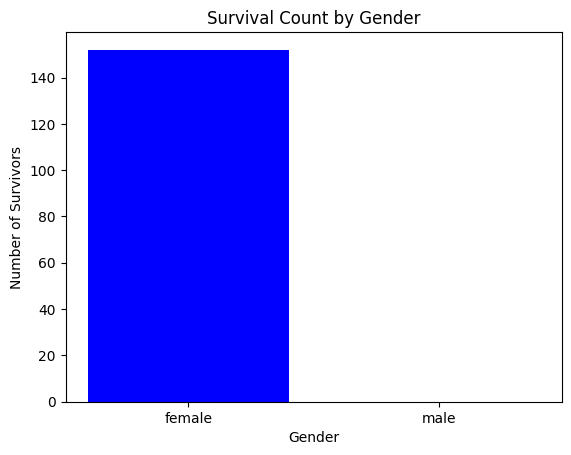

In [24]:
survival_by_gender = titanic_df.groupby('Sex')['Survived'].sum()
plt.bar(survival_by_gender.index, survival_by_gender.values, color=['blue','pink'])
plt.xlabel("Gender")
plt.ylabel("Number of Survivors")
plt.title("Survival Count by Gender")
plt.show()

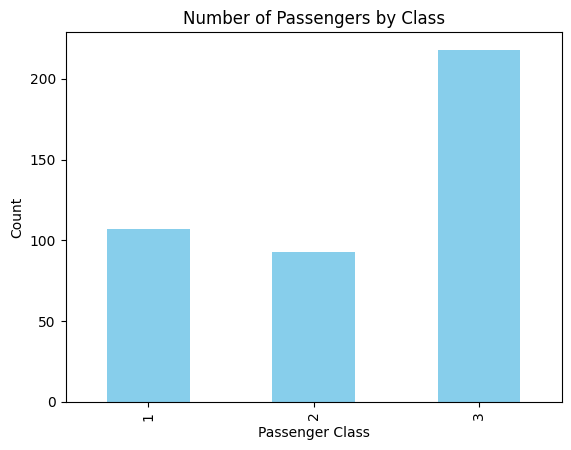

In [ ]:
titanic_df['Pclass'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

#### Scatter plots

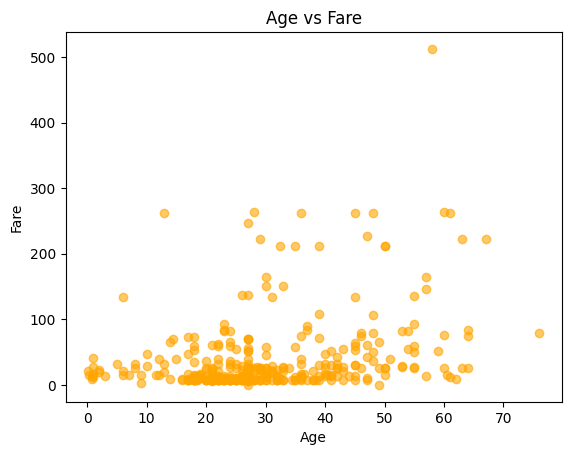

In [ ]:
plt.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.6, color='orange')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

#### Heatmaps

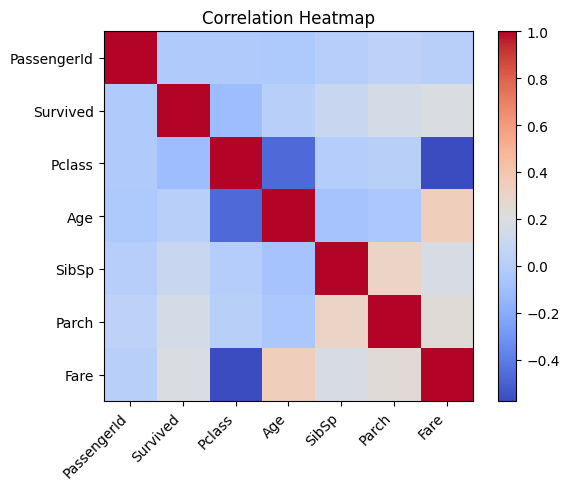

In [ ]:
corr = titanic_df.corr(numeric_only=True)
fig, ax = plt.subplots()
im = ax.imshow(corr, cmap='coolwarm')

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

plt.colorbar(im)
plt.title('Correlation Heatmap')
plt.show()

# Final Analysis

Based on the visualizations, a few clear patterns appear in the Titanic dataset.
Survival was heavily influenced by gender, with females surviving at a much higher
rate than males possibly due to "women and children first" rule.

Passenger class also mattered a lot. Most people were in 3rd class, and that group
had the lowest overall survival.

The Age vs Fare scatter plot shows that ticket prices varied widely across all
age groups, with no strong relationship between age and the fare paid. The 
correlation heatmap also confirms that survival is more closely linked with 
fare and passenger class than with age or family size.

Overall, the analysis highlights how social and economic factors played the biggest role in survival outcomes on the Titanic.